In [1]:
import os
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
sns.set(style="darkgrid")
from sklearn.metrics import classification_report

In [2]:
args= argparse.Namespace(
    loc = '../data/'
)

In [3]:
!ls ../data/runs

FalsePostive_english_task_1_run_1.tsv FalsePostive_german_task_2_run_3.tsv
FalsePostive_english_task_2_run_1.tsv FalsePostive_hindi_task_1_run_2.tsv
FalsePostive_english_task_2_run_2.tsv FalsePostive_hindi_task_2_run_1.tsv
FalsePostive_english_task_3_run_1.tsv FalsePostive_hindi_task_3_run_1.tsv
FalsePostive_german_task_1_run_2.tsv


# Global Variables

## Gold Labels

In [4]:
ENGLISH_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','english_data.tsv'),
    sep='\t'
)
HINDI_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','hindi_data.tsv'),
    sep='\t'
)
GERMAN_GOLD = pd.read_csv(
    os.path.join(args.loc,'gold','german_data.tsv'),
    sep='\t'
)

In [5]:
ENGLISH_GOLD.columns

Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')

In [6]:
HINDI_GOLD.columns

Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')

## Model Predictions

In [7]:
GERMAN_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_german_task_1_run_2.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_german_task_2_run_3.tsv',),
        sep='\t'
    ) ,
}

In [8]:
ENGLISH_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_1_run_1.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_2_run_2.tsv',),
        sep='\t'
    ) ,
    'task_3': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_english_task_3_run_1.tsv',),
        sep='\t'
    ) ,
}


In [9]:
HINDI_PREDS = {  
    'task_1': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_1_run_2.tsv',),
        sep='\t'
    ) ,
    'task_2': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_2_run_1.tsv',),
        sep='\t'
    ) ,
    'task_3': pd.read_csv(
        os.path.join(args.loc,'runs','FalsePostive_hindi_task_3_run_1.tsv',),
        sep='\t'
    ) ,
}


# Helper Functions

In [10]:
def get_analysis(
    gold_df:pd.DataFrame,
    pred_df:pd.DataFrame,
    subtask:str,
):
    """
    Args:
        gold_df: DataFrame containing gold labels
        preds_df: DataFrame containing model preds
        subtask: 1,2 or 3
    Returns:
        analysis_df: DF containing the columns  Text, True labels as 'true'
            predicted labels as 'pred'
        cross_tab: A pandas crosstab as confusion matrix
    """
    pred_df.rename(
        columns={'result':'pred'},
        inplace=True,
    )
#     gold_df = gold_df[['text_id','text',f'task_{subtask}']]
        
    analysis_df = pd.merge(
        pred_df,
        gold_df,
        on='text_id',
    )
    analysis_df.rename(
        columns={f'task_{subtask}': 'true'},
        inplace=True
    )
    cross_tab = pd.crosstab(
        analysis_df.true , #y_true
        analysis_df.pred , #y_pred
        rownames=['True'], colnames=['Predicted'], margins=True
    )
    return analysis_df, cross_tab

In [11]:

def print_samples(
    analysis_df:pd.DataFrame,
    mistakes:bool=True,
    num_samples:int=5
)-> None:
    """Prints the samples for analysis"""
    
    with pd.option_context('display.max_colwidth', -1): 
        if mistakes: #print misclassifications
            df = analysis_df[analysis_df.true != analysis_df.pred]
            [['text','true','pred']]
        else: #print correct classifications
            df = analysis_df[analysis_df.true == analysis_df.pred]
            [['text','true','pred']]
        
        del df['text_id']
        df = df[['text','pred','true']]
        print(df.sample(num_samples))
        
        print('\n',df['text'].map(len).describe())

# English Error Analysis

## Task 1

In [12]:
ENGLISH_PREDS[f'task_{1}']

Unnamed: 0         text_id result
0              0    hasoc_en_207    HOF
1              1    hasoc_en_568    HOF
2              2    hasoc_en_137    HOF
3              3    hasoc_en_214    HOF
4              4    hasoc_en_869    HOF
...          ...             ...    ...
1148        1148  hasoc_en1_7212    NOT
1149        1149  hasoc_en1_3958    NOT
1150        1150  hasoc_en1_4648    NOT
1151        1151  hasoc_en1_4832    NOT
1152        1152  hasoc_en1_3721    NOT

[1153 rows x 3 columns]

In [13]:
task = 1
eng_task_1_analysis_df, eng_task_1_crosstab =  get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [14]:
print(classification_report(
    y_true = eng_task_1_analysis_df.true,
    y_pred = eng_task_1_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

         HOF     0.4079    0.4688    0.4362       288
         NOT     0.8139    0.7734    0.7931       865

    accuracy                         0.6973      1153
   macro avg     0.6109    0.6211    0.6147      1153
weighted avg     0.7125    0.6973    0.7040      1153



In [15]:
print_samples(
    analysis_df = eng_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                      text  \
231  For those abusing didi on a daily,  LOL  She might lose the state election but she won't go without a fight !    Mamata Banerjee succeeds in breaking logjam, doctors call off strike after 7 days https://www.indiatoday.in/india/story/mamata-succeeds-doctors-call-off-strike-1550768-2019-06-17¬†‚Ä¶ via @indiatoday   
621  Pig 3 really having 'fun' with  #EuropeanCricketLeague standards, because of course.     I've seen Indians lately argue that it's okay if cricket becomes IPL only, and if anyone expects the ICC will open up the game, they're stupid.    What a sorry bunch of people.                                               
268  Ya ALLAH! let the beauty of Islam reig

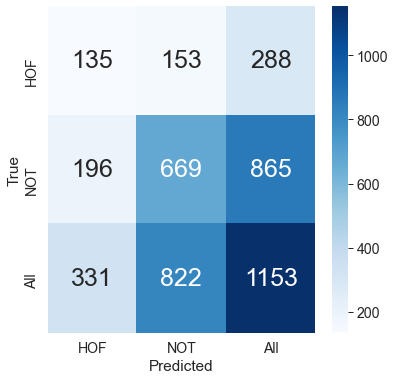

In [16]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/eng_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [17]:
task = 2
eng_task_2_analysis_df, eng_task_2_crosstab =  get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [18]:
print(classification_report(
    y_true = eng_task_2_analysis_df.true,
    y_pred = eng_task_2_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

        HATE     0.1688    0.3145    0.2197       124
        NONE     0.8139    0.7734    0.7931       865
        OFFN     0.2308    0.0423    0.0714        71
        PRFN     0.2989    0.2796    0.2889        93

    accuracy                         0.6392      1153
   macro avg     0.3781    0.3524    0.3433      1153
weighted avg     0.6671    0.6392    0.6463      1153



In [19]:
print_samples(
    analysis_df = eng_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                               text  \
17   Omar was allowed to take the oath of office on the Koran. That is a disgrace. She is follower of Islam. The difference between a radical & moderate follower is:    Radical: Worship Allah or I will behead you.  Moderate: Worship Allah or Radical will behead you.    She is the harbinger    
296  Aimim Floor Leader & (Chairman Salar E Millat Educational Trust) Janab @akbarowaisii Sahab Laying Foundation Stone of #Owaisi #Junior_College at Owaisi School of Excellence, Jamal Colony , #Riyasath_Nagar  branch  @asadowaisi @imAkbarOwaisi                                                 
894  @ZomatoIN #BycottZomato     HALAL AND HALALA      Are two most cruel possible things possible to an animal or 

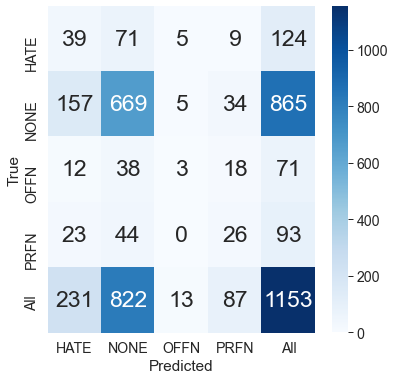

In [20]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/eng_2_confmat.pdf', format='pdf', dpi=600
    )


## Task 3

In [21]:
task = 3
eng_task_3_analysis_df, eng_task_3_crosstab = get_analysis(
    gold_df = ENGLISH_GOLD,
    pred_df = ENGLISH_PREDS[f'task_{task}'],
    subtask = task,
)

In [22]:
print(classification_report(
    y_true = eng_task_3_analysis_df.true,
    y_pred = eng_task_3_analysis_df.pred,
    digits = 4,
))

              precision    recall  f1-score   support

        NONE     0.8139    0.7734    0.7931       865
         TIN     0.3652    0.4204    0.3909       245
         UNT     0.0816    0.0930    0.0870        43

    accuracy                         0.6730      1153
   macro avg     0.4202    0.4289    0.4237      1153
weighted avg     0.6912    0.6730    0.6813      1153



In [23]:
print_samples(
    analysis_df = eng_task_3_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                    text  \
84   Then your party needs to do what it was elected to Westminster for and vote! Fuck principle somethings are more important than sitting on top of your poxxy high horse!                                                               
732  #‡§´‡§§‡§µ‡•á_‡§ï‡•Ä_‡§´‡§ø‡§ï‡•ç‡§∏‡§ø‡§Ç‡§ó wat d hell is going on.. Is it our india Mamata n all pol8cl prties who support Muslims it means they are secular fuck off                                                                                          
841  'oppressed people who don't realize they're oppressed are stupid and weak sheeple' is an odd take to call feminist or intersectional.                                                                                                 
135  Now doubt women is not 

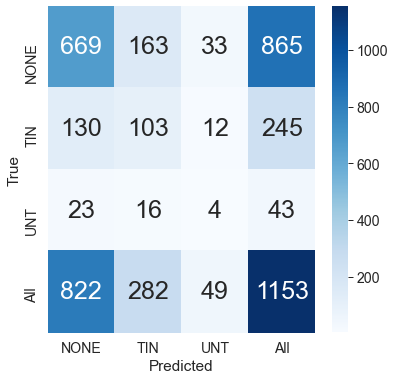

In [24]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        eng_task_3_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/eng_3_confmat.pdf', format='pdf', dpi=600
    )


# Hindi Error Analysis

## TASK 1

In [25]:
task = 1
hin_task_1_analysis_df, hin_task_1_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [26]:
print(classification_report(
    y_true = hin_task_1_analysis_df.true,
    y_pred = hin_task_1_analysis_df.pred,
    digits = 5,
))

              precision    recall  f1-score   support

         HOF    0.74519   0.76860   0.75671       605
         NOT    0.79827   0.77700   0.78749       713

    accuracy                        0.77314      1318
   macro avg    0.77173   0.77280   0.77210      1318
weighted avg    0.77391   0.77314   0.77336      1318



In [27]:
print_samples(
    analysis_df = hin_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                         text  \
1072  #‡§ï‡•Å‡§§‡•ç‡§§‡•á ‡§ï‡•Ä #‡§®‡•Ä‡§Ç‡§¶, #‡§ó‡§ø‡§∞‡§ó‡§ø‡§ü ‡§ï‡•á #‡§∞‡§Ç‡§ó, #‡§Æ‡§ó‡§∞‡§Æ‡§ö‡•ç‡§õ ‡§ï‡•á #‡§Ü‡§Å‡§∏‡•Ç..... . . . . . . . . . . ‡§≤‡§°‡§º‡§ï‡•Ä‡§Ø‡•ã‡§Ç ‡§ï‡•á #ILoveYou ‡§™‡•á ‡§ï‡§≠‡•Ä ‡§≠‡§∞‡•ã‡§∏‡§æ ‡§Æ‡§§ ‡§ï‡§∞‡§®‡§æ.... #BSDK @CRahuly                                                                                                                                               
183   ‡§≠‡§æ‡§ú‡§™‡§æ ‡§µ‡§æ‡§≤‡•ã ‡§¨‡•á‡§ü‡•Ä ‡§¨‡§ö‡§æ‡§ì ‡§®‡§æ‡§∞‡§æ ‡§•‡§æ ‡§Ø‡§æ ‡§ö‡•á‡§§‡§æ‡§µ‡§®‡•Ä ? ‡§π‡§Æ‡§æ‡§∞‡•á ‡§¶‡•á‡§∂ ‡§Æ‡•á‡§Ç ‡§Æ‡§π‡§ø‡§≤‡§æ‡§ì‡§Ç ‡§ï‡•ã ‡§¶‡•á‡§µ‡•Ä ‡§ï‡§æ ‡§¶‡§∞‡•ç‡§ú‡§æ ‡§¶‡§ø‡§Ø‡§æ ‡§ú‡§æ‡§§‡§æ ‡§π‡•à. ‡§≤‡•á‡§ï‡§ø‡§® ‡§ó‡•Å‡§ú‡§∞‡§æ‡§§ ‡§ï‡•Ä ‡§Ø‡•á ‡§

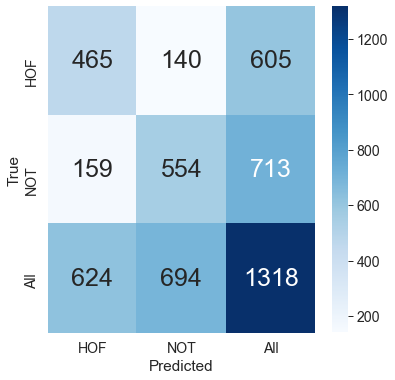

In [28]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/hin_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [29]:
task = 2
hin_task_2_analysis_df, hin_task_2_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [30]:
print_samples(
    analysis_df = hin_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
887  ‡§ï‡•å‡§® ‡§π‡•à ‡§µ‡•ã ‡§≤‡•ã‡§ó ‡§ú‡§ø‡§®‡•ç‡§π‡•á‡§Ç ‡§µ‡§®‡•ç‡§¶‡•á ‡§Æ‡§æ‡§§‡§∞‡§Æ ‡§î‡§∞ ‡§≠‡§æ‡§∞‡§§ ‡§Æ‡§æ‡§§‡§æ ‡§ï‡•Ä ‡§ú‡§Ø ‡§ï‡§π‡§®‡•á ‡§∏‡•á ‡§¶‡§ø‡§ï‡•ç‡§ï‡§§ ‡§π‡•à? ‡§Ø‡•á ‡§¶‡•á‡§∂‡§¶‡•ç‡§∞‡•ã‡§π‡•Ä ‡§π‡•à ‡§Ø‡§æ ‡§≠‡§æ‡§ú‡§™‡§æ ‡§ï‡•á ‡§¶‡§≤‡§æ‡§≤?  ‡§≠‡§æ‡§ú‡§™‡§æ ‡§á‡§®‡•ç‡§π‡•Ä ‡§∏‡§¨ ‡§´‡§∞‡•ç‡§ú‡•Ä ‡§Æ‡•Å‡§¶‡•ç‡§¶‡•ã‡§Ç ‡§ï‡•ã ‡§â‡§†‡§æ‡§ï‡§∞ ‡§¶‡•á‡§∂ ‡§ï‡•ã ‡§µ‡§ø‡§™‡§∞‡•Ä‡§§ ‡§¶‡§ø‡§∂‡§æ ‡§Æ‡•á‡§Ç ‡§≤‡•á ‡§ú‡§æ ‡§∞‡§π‡•Ä ‡§π‡•à, ‡§Ü‡§™ ‡§∂‡•å‡§ñ ‡§∏‡

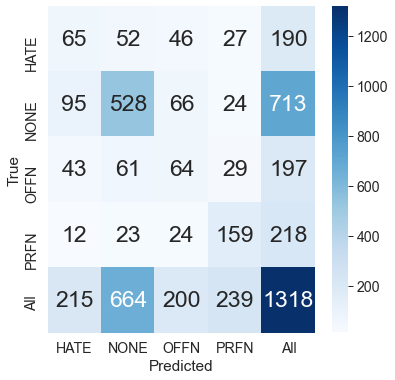

In [31]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/hin_2_confmat.pdf', format='pdf', dpi=600
    )


## Task 3

In [32]:
task = 3
hin_task_3_analysis_df, hin_task_3_crosstab =  get_analysis(
    gold_df = HINDI_GOLD,
    pred_df = HINDI_PREDS[f'task_{task}'],
    subtask = task,
)

In [33]:
print_samples(
    analysis_df = hin_task_3_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                          text  \
364   ‡§ö‡•Å‡§®‡§æ‡§µ ‡§Æ‡•á‡§Ç ‡§π‡§æ‡§∞ ‡§ï‡•á ‡§¨‡§æ‡§¶ ‡§∏‡•á ‡§π‡•Ä ‡§ó‡§æ‡§Ø‡§¨ ‡§§‡•á‡§ú‡§∏‡•ç‡§µ‡•Ä ‡§Ø‡§æ‡§¶‡§µ ‡§ï‡•Ä ‡§µ‡§æ‡§™‡§∏‡•Ä, ‡§Ö‡§π‡§≤‡•á ‡§∏‡•Å‡§¨‡§π ‡§™‡§ü‡§®‡§æ ‡§™‡§π‡•Å‡§Ç‡§ö‡•á ‡§§‡•á‡§ú‡§∏‡•ç‡§µ‡•Ä  ‡§§‡•á‡§ú‡§∏‡•ç‡§µ‡•Ä ‡§®‡•á ‡§ï‡§π‡§æ ‡§ï‡§ø ‡§Ö‡§™‡§∞‡§æ‡§ß ‡§î‡§∞ ‡§∏‡•ç‡§µ‡§æ‡§∏‡•ç‡§•‡•ç‡§Ø ‡§ï‡•á ‡§Æ‡•Å‡§¶‡•ç‡§¶‡•á ‡§™‡§∞ ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§∏‡•á ‡§∏‡§µ‡§æ‡§≤ ‡§ï‡§∞‡•á‡§Ç‡§ó‡•á‡•§ ‡§π‡§æ‡§≤‡§æ‡§Ç‡§ï‡§ø ‡§Ö‡§™‡§®‡•Ä ‡§õ‡•Å‡§ü‡•ç‡§ü‡§ø‡§Ø‡•ã‡§Ç ‡§™‡§∞ ‡§´‡§ø‡§∞ ‡§∏‡•á ‡§∏‡§´‡§æ‡§à ‡§¶‡•á‡§§‡•á ‡§π‡•Å‡§è ‡§ï‡§π‡§æ ‡§ï‡§ø ‡§µ‡•ã ‡§ú‡§π‡§æ‡§Ç ‡§•‡•á ‡§â‡§∏‡§ï‡•Ä ‡§ú‡§æ‡§®‡§ï‡§æ‡§∞‡•Ä ‡§â‡§®‡•ç‡§π‡•ã‡§Ç‡§®‡•á ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞‡§ï‡•á ‡§¶‡•á ‡§¶‡•Ä‡•§  @abpnewshindi      
11

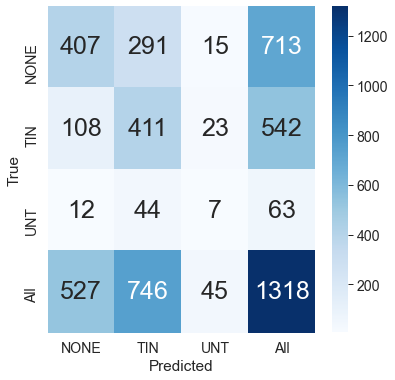

In [34]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        hin_task_3_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/hin_3_confmat.pdf', format='pdf', dpi=600
    )


# German Error Analysis

## Task 1


In [35]:
task = 1
ger_task_1_analysis_df, ger_task_1_crosstab =  get_analysis(
    gold_df = GERMAN_GOLD,
    pred_df = GERMAN_PREDS[f'task_{task}'],
    subtask = task,
)

In [36]:
print(classification_report(
    y_true = ger_task_1_analysis_df.true,
    y_pred = ger_task_1_analysis_df.pred,
    digits = 5,
))

              precision    recall  f1-score   support

         HOF    0.21277   0.14706   0.17391       136
         NOT    0.84656   0.89636   0.87075       714

    accuracy                        0.77647       850
   macro avg    0.52966   0.52171   0.52233       850
weighted avg    0.74515   0.77647   0.75925       850



In [37]:
print_samples(
    analysis_df = ger_task_1_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                text  \
784  Hoffentlich ist der bald weg, der die √∂sterreichische Kultur zerst√∂ren wollte. B√∂se Zungen sagen sogar wieder aufbl√ºhen lassen wollte.    #Faschistenm√ºssenweg. Egal ob links, rechts oder weiter nah√∂stlich.    Der #EkelWilfred, alias #Wiltewka, #Wilberg &amp; Co.  https://t.co/dqVFVSb98W   
823  Das h√§tte sich mal einer im ‚ÄûDeutschland verrecke! Deutschland Du mieses St√ºck Sch‚Ä¶‚Äú leisten sollen. Gro√üen Respekt &amp; Hochachtung vor diesem M√§del.    Der #EkelWilfred, alias das A‚Ä¶loch #Wiltewka, Papa #Wilberg von der Capitol, #WilayaWilanar &amp; O. #Wilke  https://t.co/lW2HvPZmK2   
814  Nicht gleich 'den Bettel hinschmei√üen' ‚Äì Bettel, bedeutet Nutzloses. Und diese Einstel

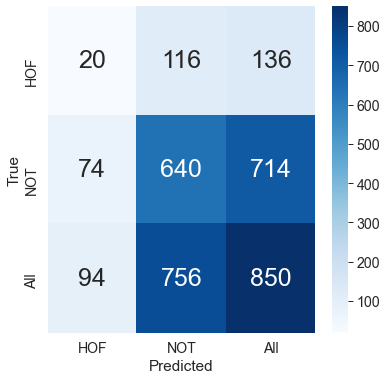

In [38]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        ger_task_1_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 25},
    )
    f.savefig(
        'confmats/ger_1_confmat.pdf', format='pdf', dpi=600
    )


## Task 2

In [39]:
task = 2
ger_task_2_analysis_df, ger_task_2_crosstab =  get_analysis(
    gold_df = GERMAN_GOLD,
    pred_df = GERMAN_PREDS[f'task_{task}'],
    subtask = task,
)

In [40]:
print_samples(
    analysis_df = ger_task_2_analysis_df,
    mistakes =True,
    num_samples=5
)

                                                                                                                                                                                                                                                                                                                                            text  \
780  Bessermenschen wollen, dass wir halbe Welt aufnehmen, Migranten sind f√ºr sie die besseren Menschen, obwohl sie oft frauenfeindlich, homophob, wissenschaftsfeindlich+radikal religi√∂s gepr√§gt sind.   Deal: Liebe Bessermenschis, zieht doch zu den 'besseren Menschen'+lasst D in Ruhe!                                                      
23   @Ralf64904117 @TheRealJoe_1958 Sehr gut. Verbl√∂dung, wo man hinschaut.                                                                                                                                                                                                                                                 

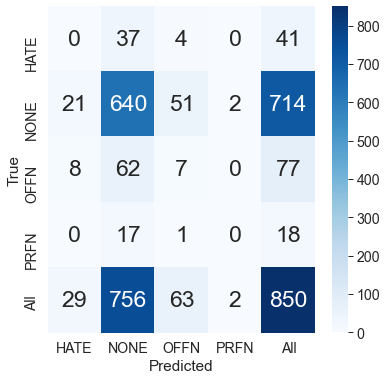

In [41]:
with sns.plotting_context('paper',font_scale=1.6):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(
        ger_task_2_crosstab,
        annot=True,
        fmt="d", 
        cmap= 'Blues',
        annot_kws={"size": 23},
    )
    f.savefig(
        'confmats/ger_2_confmat.pdf', format='pdf', dpi=600
    )
